In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt
import Cost
import random

In [34]:
dotMap = []
for i in range(4):
    center = []
    center.append(np.random.randint(100))
    center.append(np.random.randint(100))
    dotMap.append(center)
    for i in range(50):
        dot = []
        dot.append(center[0] + np.random.normal() * 8)
        dot.append(center[1] + np.random.normal() * 8)
        dotMap.append(dot)
dotMap = np.array(dotMap)

In [66]:
data_X = dotMap[:, 0]
data_Y = dotMap[:, 1]

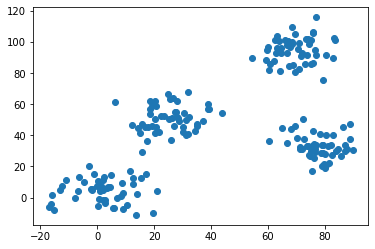

In [67]:
fig = plt.figure()
img = fig.add_subplot(111)
img.scatter(data_X, data_Y)
plt.show()

In [74]:
k = 4
center = np.zeros([k, 2])
for i in range(k):
    center[i]=(random.choice(dotMap))
center

array([[28.        , 52.        ],
       [ 1.        ,  4.        ],
       [88.72507189, 37.46274946],
       [73.03100661, 85.50619531]])

In [69]:
group = []
for i in range(k):
    group.append([])
group

[[], [], [], []]

In [90]:
for index in range(data_X.shape[0]):
    minDistance = 99999999999
    minIndex = -1
    for i in range(4):
        currentDistance = Distance.Euclidean(center[i], dotMap[index])
        if currentDistance < minDistance:
            minDistance = currentDistance
            minIndex = i
    group[minIndex].append(index)
group=np.array(group)
for i in range(k):
    groupCenter = dotMap[group[i][0]]
    for element in dotMap[group[i]]:
        groupCenter[0] = (element[0] + groupCenter[0]) / 2
        groupCenter[1] = (element[1] + groupCenter[1]) / 2
    center[i] = groupCenter

array([[33.93631887, 50.26247013],
       [77.01690353, 24.30723939],
       [23.65787855, 40.89143151],
       [24.73981236, 62.20153295]])

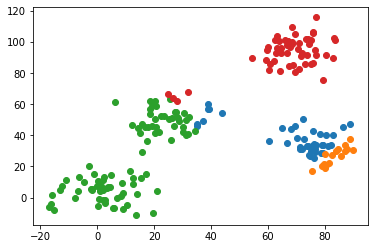

In [71]:
fig = plt.figure()
img = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(k):
    img.scatter(data_X[group[i]], data_Y[group[i]], cmap=cm)
plt.show()

array([[36.89285877, 51.24814601],
       [79.82046608, 21.90181513],
       [24.3464766 , 41.6786837 ],
       [32.29093317, 67.87851676]])

In [88]:
for index in range(data_X.shape[0]):
    minDistance = 99999999999
    minIndex = -1
    for i in range(4):
        currentDistance = Distance.Euclidean(center[i], dotMap[index])
        if currentDistance < minDistance:
            minDistance = currentDistance
            minIndex = i
    group[minIndex].append(index)
group=np.array(group)

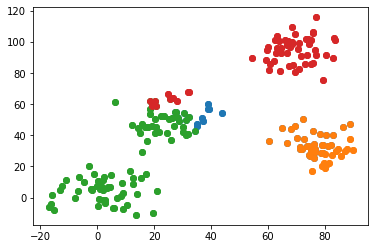

In [89]:
fig = plt.figure()
img = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(k):
    img.scatter(data_X[group[i]], data_Y[group[i]], cmap=cm)
plt.show()